In [103]:
import sys
sys.path.append('../')

import pandas as pd
import networkx as nx

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [24.0, 16.0]

SUPERINVESTOR_FILE = '../data/raw/dataroma_superinvestor.csv'

In [16]:
superinvestor_portfolios = pd.read_csv(SUPERINVESTOR_FILE)
superinvestor_portfolios.head()

,stock,portfolio_pct,shares,value,investor
0,ORCL - Oracle Corp.,5.52,882926,49541000,First Eagle Investment U.S. Value
1,CMCSA - Comcast Corp.,5.27,1119185,47274000,First Eagle Investment U.S. Value
2,CL - Colgate-Palmolive,4.37,496668,39182000,First Eagle Investment U.S. Value
3,DE - Deere & Co.,4.23,168017,37957000,First Eagle Investment U.S. Value
4,FB - Facebook Inc.,3.54,120766,31775000,First Eagle Investment U.S. Value


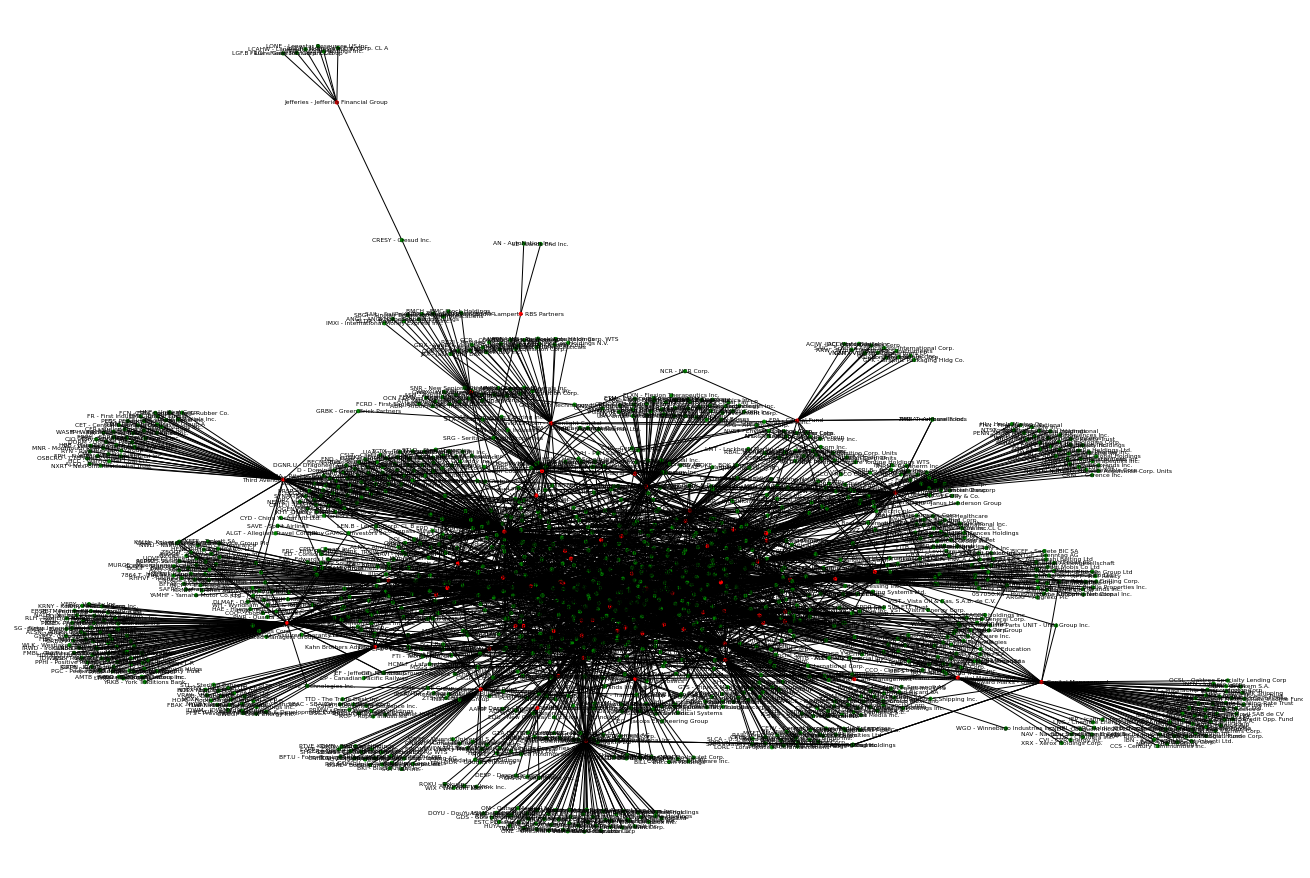

In [24]:
# Create the graph
G = nx.Graph()
for investor, stock in zip(superinvestor_portfolios['investor'], superinvestor_portfolios['stock']):
    G.add_edge(investor, stock)

# Distinguish the node between stock and investor
node_color = ['red' if g in superinvestor_portfolios['investor'].tolist() else 'green' for g in G.nodes()]
nx.draw(G, node_color=node_color, with_labels=True, node_size=10, font_size=6)

It seems that the superinvestors in generally holds a cluster of stocks which are common among themselves. There are however, a few superinvestors that has a higher level of unique stocks to themselves. Jefferies is the only one that buys stock which are held by no body.

In [26]:
print(G.number_of_nodes())
print(G.number_of_edges())

1434
2747


1      856
2      237
3      127
4       49
5       35
6       20
7       11
9        8
11       6
13       6
15       5
8        4
36       4
10       3
16       3
23       3
24       3
27       3
29       3
41       2
59       2
18       2
60       2
20       2
12       2
46       2
26       2
54       2
32       2
35       2
73       1
72       1
79       1
84       1
64       1
61       1
90       1
103      1
113      1
14       1
71       1
19       1
17       1
38       1
21       1
49       1
25       1
45       1
28       1
116      1
30       1
31       1
33       1
42       1
37       1
200      1
dtype: int64


<AxesSubplot:ylabel='Frequency'>

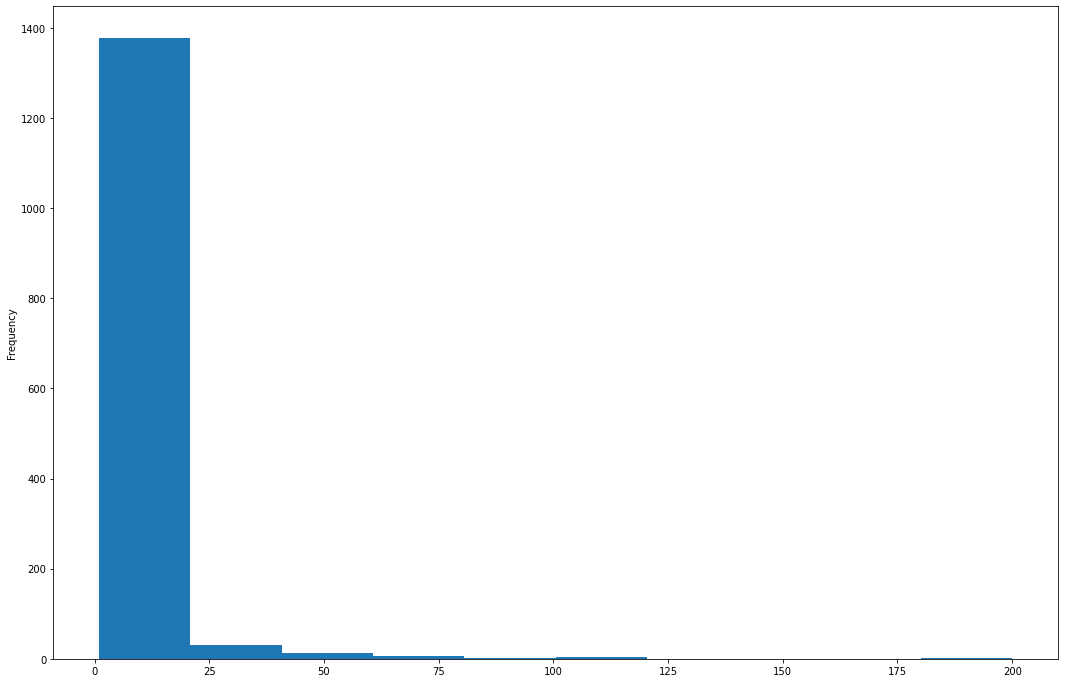

In [43]:
print(pd.Series(dict(G.degree())).value_counts())
pd.Series(dict(G.degree())).plot.hist()

Looks like most super investors owns less than 10 stocks.

Let's try to cluster the stocks based on who buys them.

In [55]:
superinvestor_portfolios_matrix = superinvestor_portfolios.pivot_table(index='investor', columns=['stock'], values='portfolio_pct', fill_value=0)

<AxesSubplot:xlabel='stock', ylabel='investor'>

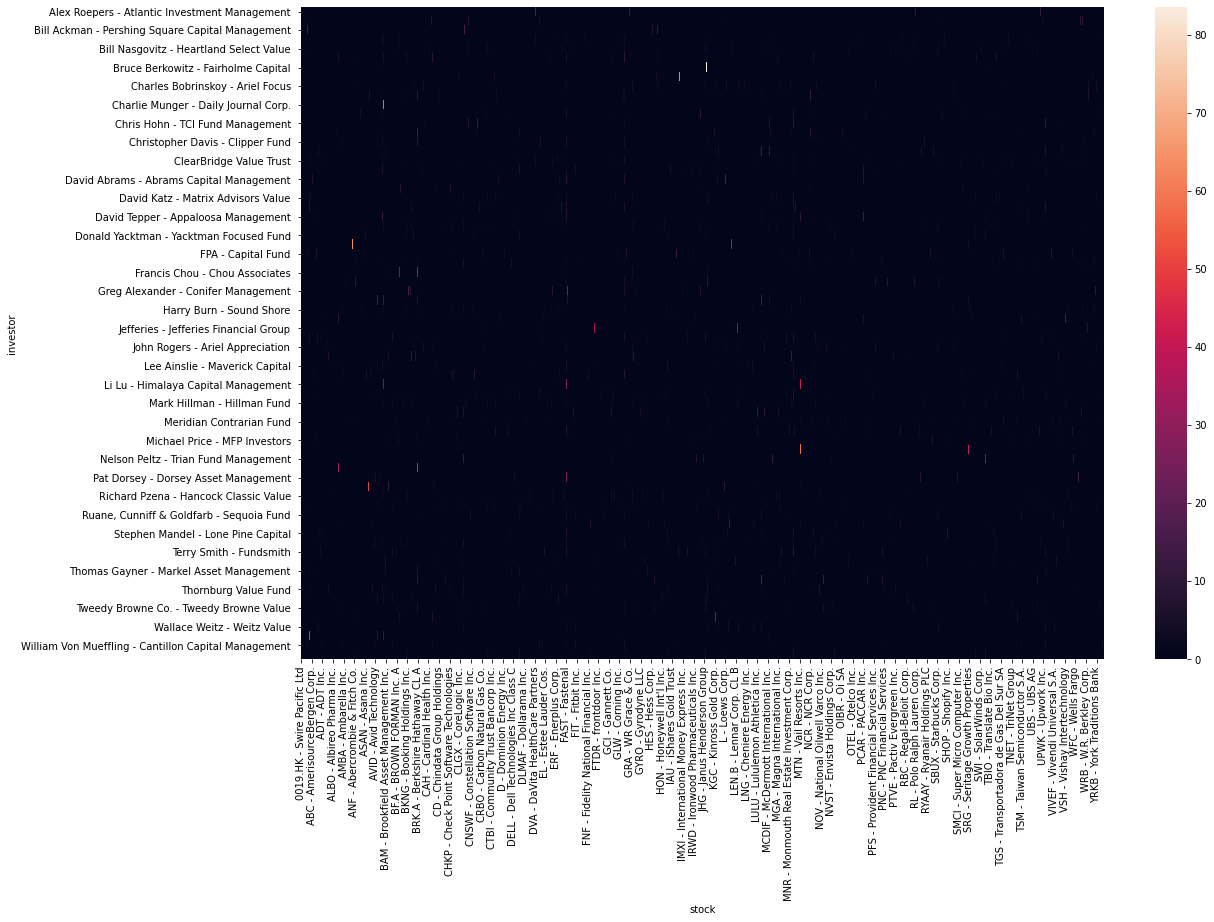

In [59]:
sns.heatmap(superinvestor_portfolios_matrix)

In [62]:
superinvestor_portfolios['investor'].unique()

array(['First Eagle Investment U.S. Value ',
       'Chase Coleman - Tiger Global Management ',
       'Yacktman Asset Management ',
       'Donald Yacktman - Yacktman Focused Fund ',
       'Christopher Davis - Clipper Fund ',
       'Mason Hawkins - Longleaf Partners ', 'Thornburg Value Fund ',
       'David Katz - Matrix Advisors Value ',
       'Ruane, Cunniff & Goldfarb - Sequoia Fund ',
       'Meridian Contrarian Fund ', 'Bill Nygren - Oakmark Select Fund ',
       'Harry Burn - Sound Shore ', 'Torray Fund ',
       'Bill Nasgovitz - Heartland Select Value ',
       'Lee Ainslie - Maverick Capital ',
       'Bruce Berkowitz - Fairholme Capital ', 'ValueAct Capital  ',
       'Nelson Peltz - Trian Fund Management ',
       'Eddie Lampert - RBS Partners ',
       'Bill & Melinda Gates Foundation Trust ',
       'David Einhorn - Greenlight Capital ',
       'Stephen Mandel - Lone Pine Capital ',
       'Norbert Lou - Punch Card Management ',
       'David Tepper - Appaloosa Managem

In [106]:
superinvestor_portfolios[superinvestor_portfolios['investor'] == 'Norbert Lou - Punch Card Management ']

,stock,portfolio_pct,shares,value,investor
927,BRK.A - Berkshire Hathaway CL A,45.21,349,111680000,Norbert Lou - Punch Card Management
928,ALLY - Ally Financial Inc.,33.39,3290300,82488000,Norbert Lou - Punch Card Management
929,WGO - Winnebago Industries Inc.,21.40,1022953,52856000,Norbert Lou - Punch Card Management


In [107]:
superinvestor_portfolios[superinvestor_portfolios['investor'] == 'Jefferies - Jefferies Financial Group ']

,stock,portfolio_pct,shares,value,investor
1736,FRGI - Fiesta Restaurant Group,35.03,5262189,49307000,Jefferies - Jefferies Financial Group
1737,LGF.A - Lions Gate Ent. Corp. CL A,25.09,3725000,35313000,Jefferies - Jefferies Financial Group
1738,LGF.B - Lions Gate Ent. Corp. CL B,19.67,3175000,27686000,Jefferies - Jefferies Financial Group
1739,LCAHW - Landcadia Holdings Inc. WTS,9.17,2941666,12914000,Jefferies - Jefferies Financial Group
1740,WTRH - Waitr Holdings Inc.,8.91,3895000,12542000,Jefferies - Jefferies Financial Group
1741,CRESY - Cresud Inc.,1.49,745460,2095000,Jefferies - Jefferies Financial Group
1742,LONE - Lonestar Resources US Inc.,0.65,3978488,915000,Jefferies - Jefferies Financial Group


In [64]:
superinvestor_portfolios.sort_values('portfolio_pct').tail(30)

,stock,portfolio_pct,shares,value,investor
813,KKR - KKR & Co. L.P.,21.74,45000000,1545300000,ValueAct Capital
812,STX - Seagate Technology,21.87,31554360,1554683000,ValueAct Capital
1709,BRK.B - Berkshire Hathaway CL B,22.56,206361,43943000,Christopher Bloomstran - Semper Augustus
1487,BAC - Bank of America Corp.,22.70,12358987,297728000,Li Lu - Himalaya Capital Management
1020,BHC - Bausch Health,22.77,1538992,22629000,Francis Chou - Chou Associates
825,PG - Procter & Gamble,23.26,10128875,1407812000,Nelson Peltz - Trian Fund Management
1392,CHTR - Charter Communications,23.32,10410705,6499820000,Chris Hohn - TCI Fund Management
2225,LOW - Lowe's Cos.,23.33,12408077,2058004000,Bill Ackman - Pershing Square Capital Management
1805,FB - Facebook Inc.,23.61,606612,158872000,Pat Dorsey - Dorsey Asset Management
1469,FCAU - Fiat Chrysler Automobiles NV,23.96,28000000,342160000,Greg Alexander - Conifer Management


In [66]:
superinvestor_portfolios.groupby('investor').size().sort_values().tail()

investor
Chase Coleman - Tiger Global Management          90
Robert Olstein - Olstein Capital Management     103
Thomas Gayner - Markel Asset Management         113
Michael Price - MFP Investors                   116
Lee Ainslie - Maverick Capital                  200
dtype: int64

In [68]:
superinvestor_portfolios[superinvestor_portfolios['investor'] == 'Lee Ainslie - Maverick Capital ']

,stock,portfolio_pct,shares,value,investor
599,FB - Facebook Inc.,6.63,1360848,356406000,Lee Ainslie - Maverick Capital
600,DD - DuPont de Nemours Inc.,6.27,6076911,337147000,Lee Ainslie - Maverick Capital
601,HUM - Humana Inc.,5.12,665987,275645000,Lee Ainslie - Maverick Capital
602,MSFT - Microsoft Corp.,4.72,1206388,253740000,Lee Ainslie - Maverick Capital
603,LRCX - Lam Research,4.54,735657,244054000,Lee Ainslie - Maverick Capital
...,...,...,...,...,...
794,DUK - Duke Energy,0.03,17145,1518000,Lee Ainslie - Maverick Capital
795,SABR - Sabre Corp.,0.03,240253,1564000,Lee Ainslie - Maverick Capital
796,GDDY - GoDaddy Inc.,0.03,21057,1600000,Lee Ainslie - Maverick Capital
797,SLM - SLM Corp.,0.03,175564,1420000,Lee Ainslie - Maverick Capital


Lee is the most diversed investor, but still holds a significant portion in common stock like FB and MSFT.

In [72]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
N_CLUSTER = 5

scaler = StandardScaler()
km = KMeans(n_clusters=N_CLUSTER)
cluster_pipeline = Pipeline(steps=[('scaler', scaler), ('cluster', km)])

In [75]:
cluster_pipeline.fit(superinvestor_portfolios_matrix)

Pipeline(steps=[('scaler', StandardScaler()),
                ('cluster', KMeans(n_clusters=5))])

In [78]:
from sklearn.cluster import AgglomerativeClustering

In [79]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [80]:
model.fit(superinvestor_portfolios_matrix)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [85]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

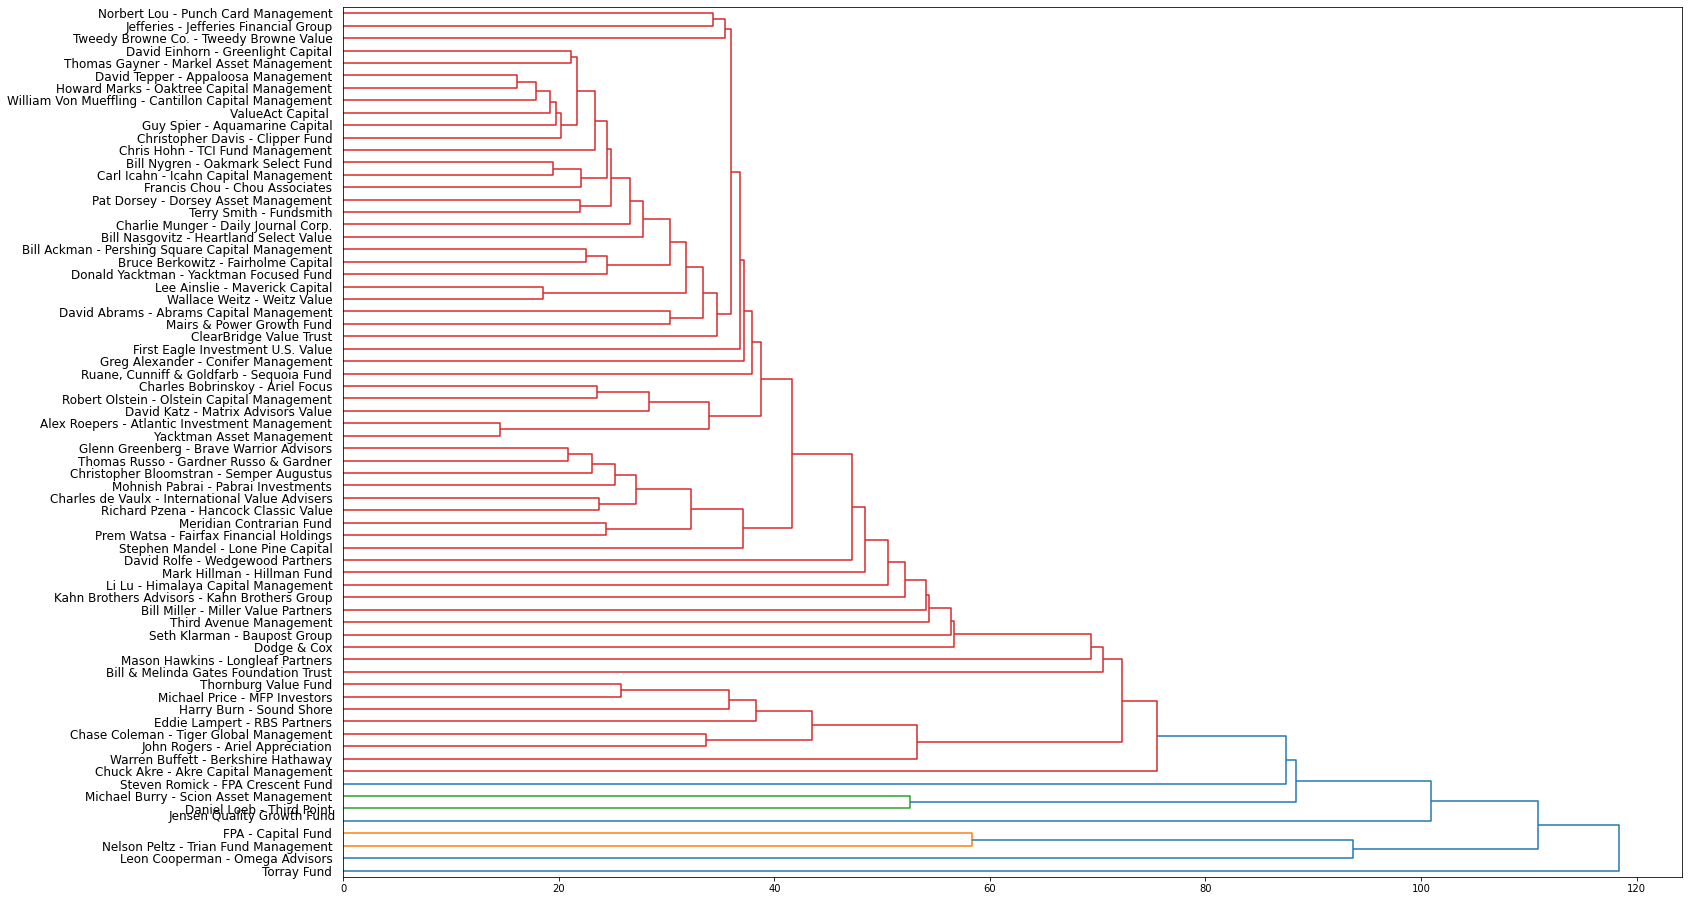

In [105]:
plot_dendrogram(model, labels=superinvestor_portfolios_matrix.index[model.labels_], orientation='right')
ax = plt.gca()
ax.tick_params(axis='y', which='major', labelsize=12)

# Use Topic modelling to get composite baskets

In [118]:
portfolio_list = [i[1]['stock'].tolist() for i in superinvestor_portfolios.groupby('investor')]

In [125]:
import gensim
from gensim import corpora
dictionary = corpora.Dictionary(portfolio_list)
corpus = [dictionary.doc2bow(text) for text in portfolio_list]

In [127]:
NUM_TOPICS = 10
ldamodel = gensim.models.ldamodel.LdaModel(
    corpus, 
    num_topics=NUM_TOPICS, 
    id2word=dictionary, 
    passes=20, 
    iterations=500,
    random_state=587, 
    chunksize=500)
topics = ldamodel.print_topics(num_words=5)
for topic in topics:
    print(topic)


(0, '0.019*"GOOG - Alphabet Inc. CL C" + 0.017*"FB - Facebook Inc." + 0.012*"V - Visa Inc." + 0.011*"AMZN - Amazon Corp." + 0.011*"GOOGL - Alphabet Inc."')
(1, '0.013*"FB - Facebook Inc." + 0.010*"GOOG - Alphabet Inc. CL C" + 0.010*"GOOGL - Alphabet Inc." + 0.007*"BAC - Bank of America Corp." + 0.007*"COF - Capital One Financial"')
(2, '0.009*"BABA - Alibaba Group Holdings" + 0.009*"FB - Facebook Inc." + 0.007*"AMZN - Amazon Corp." + 0.007*"GOOGL - Alphabet Inc." + 0.007*"RTP.U - Reinvent Technology Partners Units"')
(3, '0.012*"GOOG - Alphabet Inc. CL C" + 0.012*"MSFT - Microsoft Corp." + 0.012*"FB - Facebook Inc." + 0.012*"CMCSA - Comcast Corp." + 0.008*"WFC - Wells Fargo"')
(4, '0.012*"MA - Mastercard Inc." + 0.009*"BRK.B - Berkshire Hathaway CL B" + 0.009*"WFC - Wells Fargo" + 0.009*"BKNG - Booking Holdings Inc." + 0.009*"FB - Facebook Inc."')
(5, '0.010*"JNJ - Johnson & Johnson" + 0.007*"USB - U.S. Bancorp" + 0.007*"WFC - Wells Fargo" + 0.005*"UHAL - AMERCO" + 0.005*"V - Visa Inc.

Except for the last one, basically all the composition are household names like alphabet and facebook and looks like the "Top 10 most owned stocks" on the home page.

In [133]:
import pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.050563  0.156704       1        1  18.493906
6      0.094973 -0.001115       2        1  17.174856
9      0.091046  0.029186       3        1  11.619761
2     -0.149642 -0.076876       4        1  11.278807
5      0.074936 -0.083765       5        1  10.631623
0     -0.036110  0.020679       6        1  10.046696
4     -0.007017 -0.020710       7        1   7.201696
1     -0.011567 -0.035604       8        1   6.472777
3     -0.016338 -0.008133       9        1   4.724460
7      0.010281  0.019634      10        1   2.355417, topic_info=                             Term       Freq      Total Category  logprob  \
70             FB - Facebook Inc.  20.000000  20.000000  Default  30.0000   
351       XOM - Exxon Mobil Corp.   6.000000   6.000000  Default  29.0000   
18      GOOG - Alphabet Inc. CL C  17.000000  17.000000  Default  28.0000   
346               NKE - NIKE Inc.   5.000000   5.000000  Default  27.0000   
345             MRK - Merck & Co.   4.000000   4.000000  Default  26.0000   
..                            ...        ...        ...      ...      ...   
91   NXPI - NXP Semiconductors NV   0.362384   3.702693  Topic10  -5.1849   
804   DD - DuPont de Nemours Inc.   0.362383   5.173555  Topic10  -5.1849   
338         DIS - Walt Disney Co.   0.362383   8.661757  Topic10  -5.1849   
123          CSCO - Cisco Systems   0.362383   6.049084  Topic10  -5.1849   
343            KO - Coca Cola Co.   0.362383   4.310531  Topic10  -5.1849   

     loglift  
70   30.0000  
351  29.0000  
18   28.0000  
346  27.0000  
345  26.0000  
..       ...  
91    1.4243  
804   1.0898  
338   0.5745  
123   0.9335  
343   1.2723  

[701 rows x 6 columns], token_table=      Topic      Freq                                         Term
term                                                              
1173      9  0.892201                  0019.HK - Swire Pacific Ltd
548       3  0.755047             012330.KS - Hyundai Mobis Co Ltd
1175      9  0.892201                028260.KS - Samsung C&T Corp.
549       3  0.755047                       033780.KS - KT&G Corp.
550       3  0.755047  057050.KS - Hyundai Home Shopping Net Corp.
...     ...       ...                                          ...
225       9  0.258786                 ZBH - Zimmer Biomet Holdings
325       4  0.756336                           ZEN - Zendesk Inc.
326       4  0.756336              ZI - ZoomInfo Technologies Inc.
327       4  0.756336          ZM - Zoom Video Communications Inc.
886       1  0.707199                           ZUMZ - Zumiez Inc.

[1072 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 7, 10, 3, 6, 1, 5, 2, 4, 8])

* 1: banking
* 2: tech
* 3: bunch of everything
* 4: also tech
* 5: finance
* 6 - 10: diversified portfolio.